# Time Series Decomposition
Each time series is said to be made up on 3 components:
1. Trend (and cycle), which is just called trend (T)
2. Seasonality (S)
3. Random noise (R)
  
These components make up the series either additively, or multiplicatively:  
**Time Series = S + T + R** or  
**Time Series = S x T x R** (which is addition in log-space log(Time Series) = log(S) + log(T) + log(R)  
  
**Note** - The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. Multiplicative decompositions are common with economic time series.

## Estimating trend with moving averages (MA)
This is a classic method from classical decomposition which comes in two forms:
1. **Centered moving average**  - This can be used to remove trend, and describing the data.  
${T}_{t} =  \frac{1}{m} \sum_{j=-k}^{k} {y}_{t+j}$  
where m is the order of the time series, and $m = 2k+1$ elements of the time series are averaged together. 
  
  
2. **Trailing Moving Average** - This only using historical data, and may be used for forecasting.  
${T}_{t} =  \frac{1}{m} \sum_{j=-2k}^{0} {y}_{t+j}$ 
  
  
**Note** - 
- These are usually of odd-order (3,5,7) so that the average is symmetric. Further, an even-order MA can be made symmetric by using an even order MA over it.  
- A  2×12-MA can be used to estimate the trend-cycle of monthly data and a 7-MA can be used to estimate the trend-cycle of daily data with a weekly seasonality. Other choices for the order of the MA will usually result in trend-cycle estimates being contaminated by the seasonality in the data.  
- You can also have weighted MAs.  
- There are some limitations to these methods:
1. There will not be estimates for the 2k points in the dataset. For centered moving average, this will be the first and last k points. For trailing moving average, this will be the first 2k points.  
2. Centered moving averages cannot be used for forecasting since it using future data points to estimate the value for the current time point.  

In [1]:
# Importing useful libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading in data
data = pd.read_csv('data/prices.csv')
data = data.loc[data['symbol'] == 'AMZN']

data['t'] = np.arange(len(data))

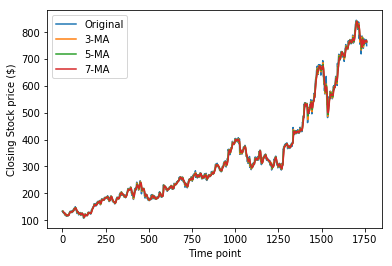

In [3]:
plt.plot(data['t'], data['close'], label = 'Original')
plt.plot(data['t'], data.loc[:,'close'].rolling(window=3).mean(), label='3-MA')
plt.plot(data['t'], data.loc[:,'close'].rolling(window=5).mean(), label='5-MA')
plt.plot(data['t'], data.loc[:,'close'].rolling(window=7).mean(), label='7-MA')
plt.legend()
plt.ylabel('Closing Stock price ($)');
plt.xlabel('Time point');

**Observation** - As we increase the order of the time series, the curves becomes increasingly smoother.

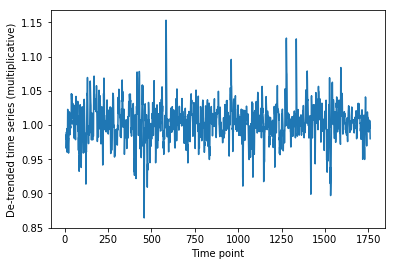

In [4]:
trend = data.loc[:,'close'].rolling(window=7).mean()
plt.plot(data['t'], data['close']/trend)
plt.ylabel('De-trended time series (multiplicative)');
plt.xlabel('Time point');

## Naive Decomposition

/Users/aprakash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


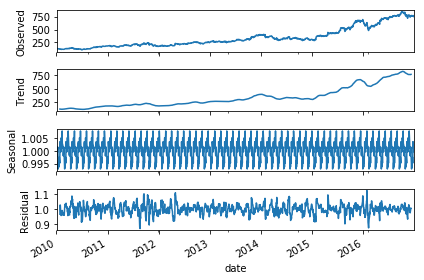

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = data[['date','close']]
#series.index = pd.to_datetime(series.date)
series.reset_index(inplace=True)
series['date'] = pd.to_datetime(series['date'])
series = series.set_index('date')
result = seasonal_decompose(series['close'], model='multiplicative', freq=30)
result.plot()
pyplot.show()


/Users/aprakash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


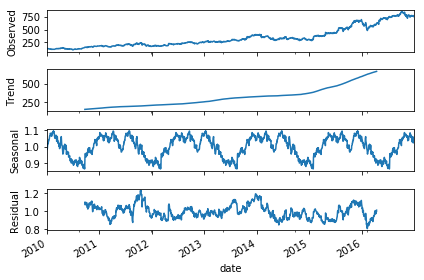

In [23]:
series = data[['date','close']]
#series.index = pd.to_datetime(series.date)
series.reset_index(inplace=True)
series['date'] = pd.to_datetime(series['date'])
series = series.set_index('date')
result = seasonal_decompose(series['close'], model='multiplicative', freq=365)
result.plot()
pyplot.show()